In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
boombikes = pd.read_csv('day.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [19]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [88]:
boombikes = boombikes.drop('instant', axis=1)


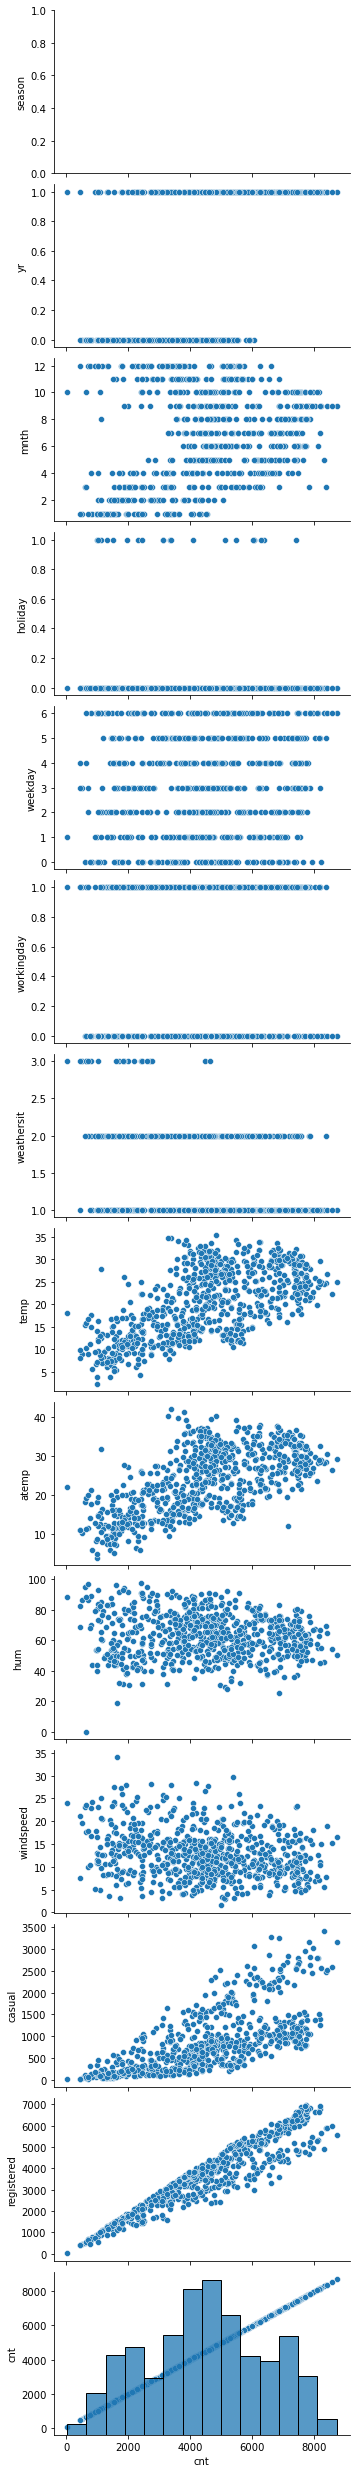

In [25]:
sns.pairplot(data=boombikes, x_vars = 'cnt', aspect=2)
plt.show()

cnt can be seen increasing with temp, atemp,casual and registed. 
From categorical variabels, cnt is more in yr 2019, cnt is varrying with mnth and max in sep adn oct, cnt is much more on weekdays, Sunday and Monday has ore cnt compared to other days.

In [25]:
boombikes.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

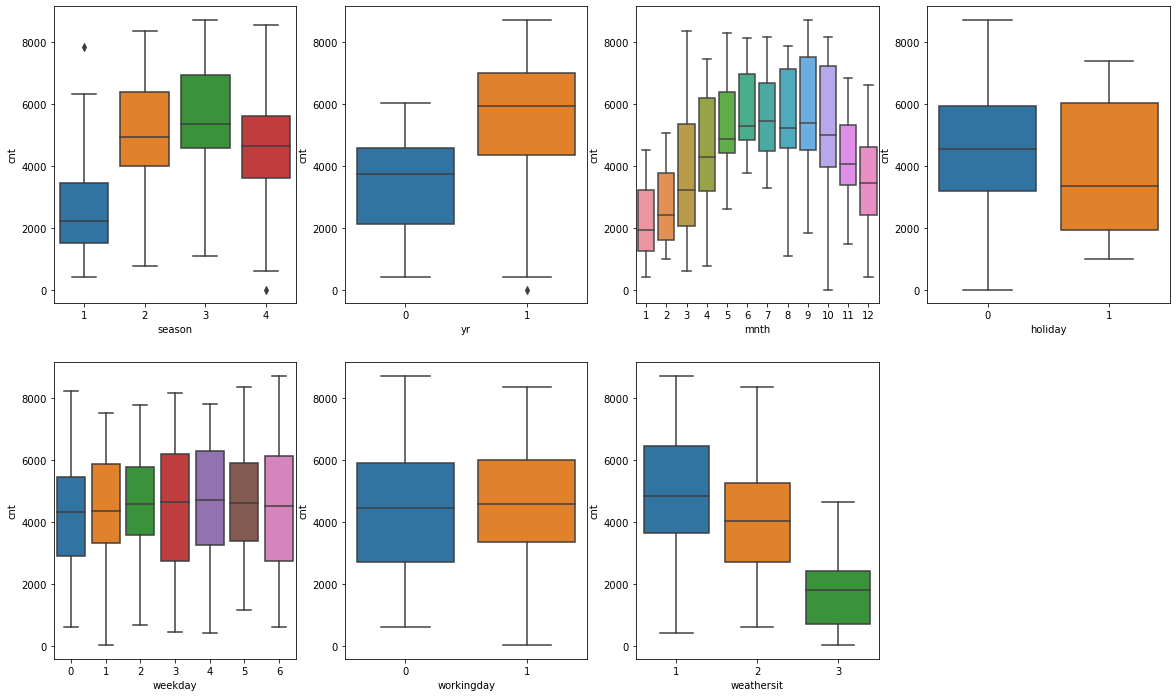

In [31]:
#Visulaise categorical variable

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=boombikes)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=boombikes)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=boombikes)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=boombikes)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=boombikes)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=boombikes)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=boombikes)

# Preparation of Data for Modeling

In [21]:
boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


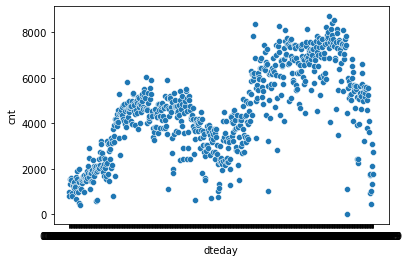

In [8]:
sns.scatterplot(x=boombikes.dteday,y=boombikes.cnt)
plt.show()

dteday do not has non linear behavior with respect to cnt. It would good idea to drop this variable

In [9]:
boombikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [89]:
#Converting season to category string season : season (1:spring, 2:summer, 3:fall, 4:winter)
boombikes['season'] = boombikes['season'].map({1:'spring', 2:'summer', 3:'fall',4:'winter'}) 


In [90]:
#Converting season to category string weathersit 
boombikes['weathersit'] = boombikes['weathersit'].map({1:'clear', 2:'mist', 3:'rain',4:'heavyrain'})
boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [91]:
boombikes = boombikes.drop('dteday', axis=1)

In [92]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Dummy Variables

In [93]:
season_dummy=pd.get_dummies(boombikes['season'])
season_dummy

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
725,0,1,0,0
726,0,1,0,0
727,0,1,0,0
728,0,1,0,0


In [94]:
#dropping redundnt dummry var
season_dummy=pd.get_dummies(boombikes['season'], drop_first=True)
season_dummy

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [95]:
boombikes = pd.concat([boombikes, season_dummy], axis=1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,spring,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,spring,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [96]:
boombikes = boombikes.drop('season', axis=1)
boombikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [97]:
weathersit_dummy=pd.get_dummies(boombikes['weathersit'])
weathersit_dummy

,clear,mist,rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [98]:
weathersit_dummy=pd.get_dummies(boombikes['weathersit'], drop_first=True)
boombikes = pd.concat([boombikes, weathersit_dummy], axis=1)
boombikes = boombikes.drop('weathersit', axis=1)
boombikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,rain
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [99]:
boombikes['weekday'] = boombikes['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thursday', 5:'Friday', 6:'Saturday'})
boombikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,rain
0,0,1,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0
1,0,1,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0
2,0,1,0,Monday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,Tuesday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,1,0,Wednesday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


In [100]:
weekday_dummy=pd.get_dummies(boombikes['weekday'])
weekday_dummy

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
725,0,0,0,0,1,0,0
726,1,0,0,0,0,0,0
727,0,0,1,0,0,0,0
728,0,0,0,1,0,0,0


In [101]:
weekday_dummy=pd.get_dummies(boombikes['weekday'], drop_first=True)
boombikes = pd.concat([boombikes, weekday_dummy], axis=1)
boombikes = boombikes.drop('weekday', axis=1)
boombikes.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0,0,0,1,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,0,0,0,1


In [102]:
boombikes.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,0.246575,0.252055,0.243836,0.336986,0.028767,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,3.450215,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,0.431313,0.434490,0.429689,0.473004,0.167266,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
#month as categorical variable
boombikes['mnth'] = boombikes['mnth'].map({0:'Jan', 1:'Feb', 2:'Mar', 3:'April',4:'May', 5:'June', 6:'July', 7:'Aug', 8:'Sep', 9:'Oct', 10:'Nov',11:'Dec'})
boombikes.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,Feb,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,1,0,0,1,0,0,0,0
1,0,Feb,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,1,0,0,0,1,0,0,0
2,0,Feb,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,1,0,0,0,0,0
3,0,Feb,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,0,0,0,1,0
4,0,Feb,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,0,0,0,1


In [104]:
mnth_dummy=pd.get_dummies(boombikes['mnth'])
mnth_dummy

,April,Aug,Dec,Feb,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,0
726,0,0,0,0,0,0,0,0,0,0,0
727,0,0,0,0,0,0,0,0,0,0,0
728,0,0,0,0,0,0,0,0,0,0,0


In [105]:
boombikes = pd.concat([boombikes, mnth_dummy], axis=1)
boombikes = boombikes.drop('mnth', axis=1)


In [106]:
pd.set_option('display.max_columns', None)
boombikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,Aug,Dec,Feb,July,June,Mar,May,Nov,Oct,Sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,0.246575,0.252055,0.243836,0.336986,0.028767,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.076712,0.082192,0.084932,0.082192,0.084932
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,0.431313,0.434490,0.429689,0.473004,0.167266,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971,0.266317,0.274845,0.278971,0.274845,0.278971
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Splitting the data into train and test

In [69]:
import sklearn
from sklearn.model_selection import train_test_split

In [107]:
df_train, df_test = train_test_split(boombikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


In [108]:
#Rescaling of variables

from sklearn.preprocessing import MinMaxScaler

In [109]:
boombikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'spring', 'summer', 'winter', 'mist',
       'rain', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'April', 'Aug', 'Dec', 'Feb', 'July', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'],
      dtype='object')

In [111]:
#1. Instantiate an object
scaler = MinMaxScaler()

#2. Fit on data

num_vars = [ 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt' ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-111-376913421a3b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [112]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,mist,rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,Aug,Dec,Feb,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,0.243137,0.247059,0.247059,0.345098,0.029412,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.098039,0.076471,0.086275,0.088235,0.076471,0.084314,0.066667,0.078431,0.084314,0.080392,0.096078
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,0.429398,0.431725,0.431725,0.475867,0.169124,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.297660,0.266010,0.281045,0.283915,0.266010,0.278131,0.249689,0.269113,0.278131,0.272166,0.294988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training the model

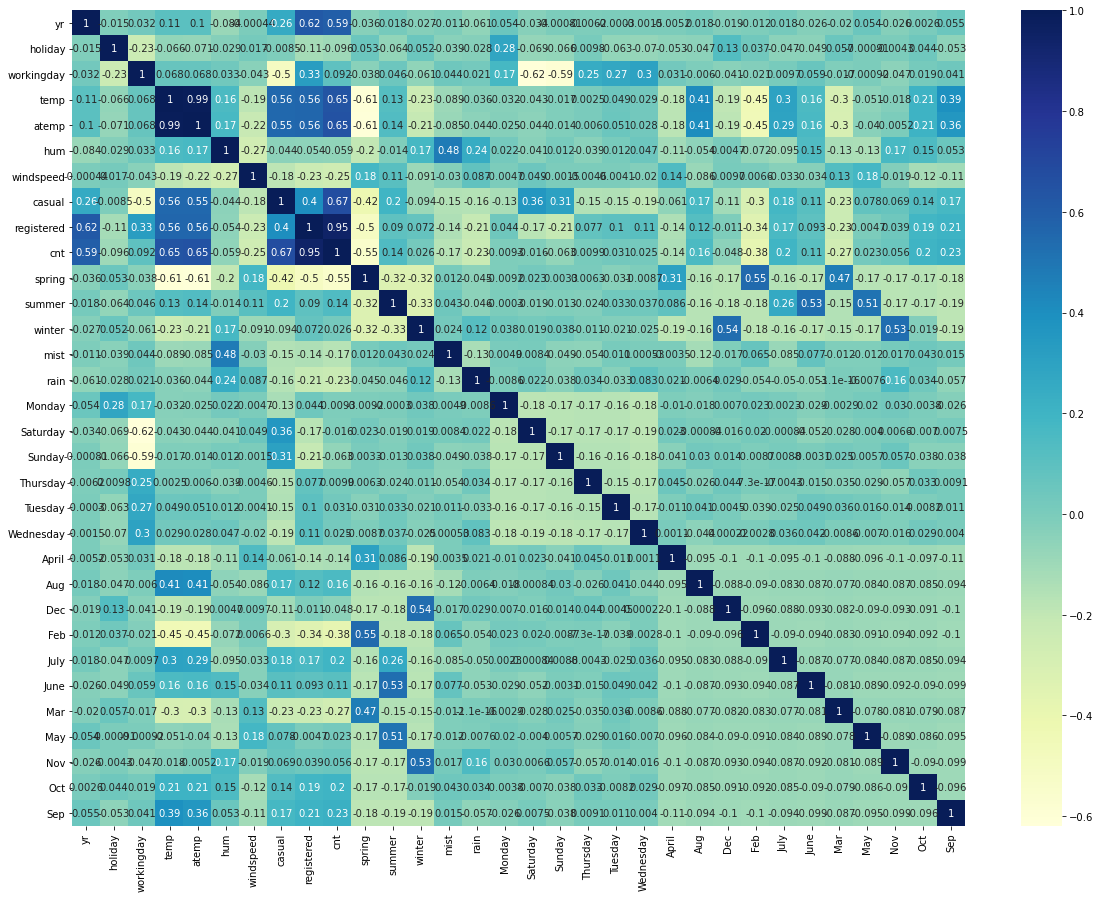

In [113]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

Strongly correlated variables
1. temp and atemp 


In [114]:
# X_train, y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [115]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,spring,summer,winter,mist,rain,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,Aug,Dec,Feb,July,June,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [116]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [118]:
X_train.shape

(510, 31)

In [117]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [196]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12 )             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [197]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', False, 4),
 ('casual', True, 1),
 ('registered', True, 1),
 ('spring', False, 19),
 ('summer', False, 8),
 ('winter', False, 16),
 ('mist', True, 1),
 ('rain', True, 1),
 ('Monday', False, 12),
 ('Saturday', False, 13),
 ('Sunday', True, 1),
 ('Thursday', True, 1),
 ('Tuesday', False, 7),
 ('Wednesday', False, 15),
 ('April', False, 17),
 ('Aug', False, 14),
 ('Dec', False, 5),
 ('Feb', True, 1),
 ('July', False, 20),
 ('June', False, 10),
 ('Mar', True, 1),
 ('May', False, 2),
 ('Nov', False, 18),
 ('Oct', False, 6),
 ('Sep', True, 1)]

In [198]:
# Features included in futher analysis
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'casual', 'registered', 'mist', 'rain', 'Sunday',
       'Thursday', 'Feb', 'Mar', 'Sep'],
      dtype='object')

In [199]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'windspeed', 'spring', 'summer',
       'winter', 'Monday', 'Saturday', 'Tuesday', 'Wednesday', 'April', 'Aug',
       'Dec', 'July', 'June', 'May', 'Nov', 'Oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [222]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [223]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [224]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [225]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.001e+29
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:15:28   Log-Likelihood:                 16294.
No. Observations:                 510   AIC:                        -3.256e+04
Df Residuals:                     497   BIC:                        -3.251e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.367e-15   9.14e-16      1.496      0.1

#### Features with hig P value in descending order - feb

In [226]:
# Dropping Feb
X_train_new = X_train_rfe.drop(["Feb"], axis = 1)

Rebuilding model without temp

In [227]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [228]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [229]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.170e+29
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:16:18   Log-Likelihood:                 16597.
No. Observations:                 510   AIC:                        -3.317e+04
Df Residuals:                     498   BIC:                        -3.312e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.58e-16   4.62e-16      0.991      0.3

In [231]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,registered,21.56
1,temp,17.66
2,hum,13.52
3,casual,5.02
0,yr,4.52
5,mist,2.33
7,Sunday,1.58
6,rain,1.38
10,Sep,1.31
8,Thursday,1.22


In [232]:
# Dropping hum
X_train_new1 = X_train_new.drop(["hum"], axis = 1)

In [233]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [234]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [235]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.200e+30
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:17:08   Log-Likelihood:                 16858.
No. Observations:                 510   AIC:                        -3.369e+04
Df Residuals:                     499   BIC:                        -3.365e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -1.7e-16   1.74e-16     -0.979      0.3

In [236]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,registered,18.17
1,temp,15.67
2,casual,4.98
0,yr,4.36
4,mist,1.45
6,Sunday,1.44
9,Sep,1.27
7,Thursday,1.21
5,rain,1.15
8,Mar,1.07


In [237]:
X_train_new2 = X_train_new2.drop(['temp'], axis=1)

In [238]:
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.630e+31
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:18:42   Log-Likelihood:                 17630.
No. Observations:                 510   AIC:                        -3.525e+04
Df Residuals:                     503   BIC:                        -3.522e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.082e-16   3.13e-17      6.658      0.0

In [254]:
lm.params

const         2.081668e-16
casual        3.774735e-01
registered    7.968247e-01
rain          1.595946e-16
Thursday     -1.040834e-16
Feb          -2.389582e-16
Sep           3.295975e-16
dtype: float64

In [255]:
sorted(lm.params)

[-2.389581588158052e-16,
 -1.0408340855860843e-16,
 1.5959455978986625e-16,
 2.0816681711721685e-16,
 3.2959746043559335e-16,
 0.3774735388863325,
 0.7968246663598709]

In [240]:
X_train_new2 = X_train_new2.drop(['const'], axis=1)

In [241]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,registered,3.56
0,casual,3.13
3,Thursday,1.20
5,Sep,1.16
4,Feb,1.04
2,rain,1.01


# Residual Analysis of the train data

In [242]:
y_train_cnt = lm.predict(X_train_lm)

In [243]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Errors')

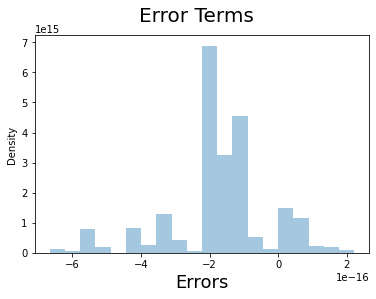

In [244]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions

In [245]:
num_vars = [ 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt' ]
df_test[num_vars] = scaler.transform(df_test[num_vars])

<ipython-input-245-b0d32e95f3bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [246]:
y_test = df_test.pop('cnt')
X_test = df_test

In [247]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new2.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [248]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

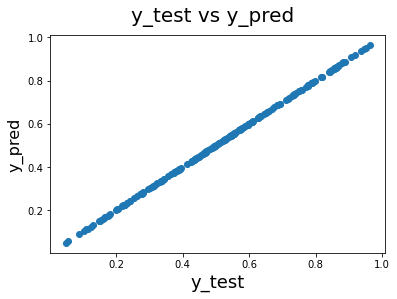

In [249]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [250]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0